In [78]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

gpu = torch.cuda.current_device()
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1650 with Max-Q Design'

Do a linear regression

In [79]:
# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# float32 is good for gpu
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# torch needs this type of array format for processing
# it needs in format: n_samples, n_features
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [80]:
# 1. design model

# for our case, both input features and output features are 1
input_size = n_features
output_size = 1
model = nn.Linear(in_features=input_size, out_features=output_size)

# 2. define loss and optimizer
learning_rate = 0.001

loss = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

X_test = torch.tensor([5], dtype=torch.float32)
print(f"Prediction before training for f(5) == {model(X_test).item()}")

# 3. Training loop
n_iters = 10000
for epoch in range(n_iters):

    # 1. forward pass
    y_predicted = model.forward(X)

    # 2. loss
    l = loss(y, y_predicted)

    # 3. backward pass
    l.backward()

    # 4. update optimizer
    optimizer.step()

    # 5. reset gradients
    optimizer.zero_grad()

    # print info
    if epoch % 1000 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f"Prediction after training for f(5) == {model(X_test).item()}")

Prediction before training for f(5) == -4.357898235321045
epoch 1: w = -0.808, loss = 2202.57788086
epoch 1001: w = 37.727, loss = 385.60919189
epoch 2001: w = 45.237, loss = 315.31286621
epoch 3001: w = 46.744, loss = 312.35180664
epoch 4001: w = 47.053, loss = 312.22293091
epoch 5001: w = 47.116, loss = 312.21725464
epoch 6001: w = 47.130, loss = 312.21701050
epoch 7001: w = 47.132, loss = 312.21697998
epoch 8001: w = 47.132, loss = 312.21701050
epoch 9001: w = 47.132, loss = 312.21701050
Prediction after training for f(5) == 237.99037170410156


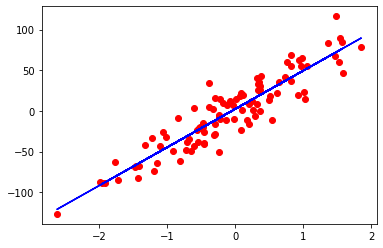

In [81]:
# plot the graph
predicted = model(X).detach()
# the detach method set the `requires_grad`
# argument in `model.parameters()` to be false

plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, 'b')
plt.show()
